Title

In [2]:
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Introduction

Preliminary exploratory data analysis

In [3]:
## Load datasets from URL

algerian_forest_fire_Bejaia <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", 
                                 skip = 1, n_max = 122) %>%
    mutate(Region = "Bejaia")

algerian_forest_fire_Sidi_Bel_Abbes <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv",
                                               skip = 126) %>%
    mutate(Region = "Sidi Bel Abbes")

## Merge datasets

algeria_forest_fire_all_data <- rbind(algerian_forest_fire_Bejaia, algerian_forest_fire_Sidi_Bel_Abbes) %>%
    mutate(Classes = as_factor(Classes)) %>%
    mutate(Region = as_factor(Region))

## TEMPORARY SOLUTION: Remove row with typo
# algeria_forest_fire_all_data <- algeria_forest_fire_all_data[-c(166),] %>%
#    mutate(DC = as.numeric(DC)) %>%
#    mutate(FWI = as.numeric(FWI))

## PROPOSED SOLUTION: Manually set values of incorrect columns, convert DC and FWI to numeric type

algeria_forest_fire_all_data[166, 10] <- '14.6'
algeria_forest_fire_all_data[166, 11] <- 9
algeria_forest_fire_all_data[166, 12] <- 12.5
algeria_forest_fire_all_data[166, 13] <- '10.4'
algeria_forest_fire_all_data[166, 14] <- "fire" 

algeria_forest_fire_all_data <- algeria_forest_fire_all_data %>%
    mutate(DC = as.numeric(DC)) %>%
    mutate(FWI = as.numeric(FWI))

## Create date column
algeria_forest_fire_all_data <- algeria_forest_fire_all_data %>%
    mutate(date = as.Date(paste(year, month, day, sep='-')))

## Create training dataset

set.seed(38)

forest_fire_split <- initial_split(algeria_forest_fire_all_data, prop = 0.65, strata = Classes)
forest_fire_train <- training(forest_fire_split)
forest_fire_test <- testing(forest_fire_split)

forest_fire_train


Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“1 parsing failure.
row col   expected     actual                                                                                                       file
 44  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-lear

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-06-04
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26,09,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi Bel Abbes,2012-09-26
27,09,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi Bel Abbes,2012-09-27
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel Abbes,2012-09-28
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel Abbes,2012-09-29


Methods

Expected outcomes and significance

In [4]:
## Explore means of numeric, non-date columns for both regions

bejaia_means <- forest_fire_train %>%
    filter(Region == "Bejaia") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

bejaia_means

sidi_bel_abbes_means <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

sidi_bel_abbes_means

all_data_means <- forest_fire_train %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

all_data_means

## Explore means of numeric, non-date columns for both regions during fire and non fire periods

bejaia_fire_means <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

bejaia_fire_means

bejaia_not_fire_means <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

bejaia_not_fire_means

sidi_bel_abbes_fire_means <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

sidi_bel_abbes_fire_means

sidi_bel_abbes_not_fire_means <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(mean)

sidi_bel_abbes_not_fire_means

## Explore medians of numeric, non-date columns for both regions

bejaia_medians <- forest_fire_train %>%
    filter(Region == "Bejaia") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

bejaia_medians

sidi_bel_abbes_medians <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

sidi_bel_abbes_medians

all_data_medians <- forest_fire_train %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

all_data_medians

## Explore medians of numeric, non-date columns during wildfire and non-wildfire periods

bejaia_fire_medians <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

bejaia_fire_medians

bejaia_not_fire_medians <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

bejaia_not_fire_medians

sidi_bel_abbes_fire_medians <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

sidi_bel_abbes_fire_medians

sidi_bel_abbes_not_fire_medians <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(median)

sidi_bel_abbes_not_fire_medians

## Explore max values of numeric, non-date columns for both regions

bejaia_max <- forest_fire_train %>%
    filter(Region == "Bejaia") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

bejaia_max

sidi_bel_abbes_max <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

sidi_bel_abbes_max

## Explore maximum values of numeric, non-date columns during fire and non-fire periods

bejaia_fire_max <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

bejaia_not_fire_max <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

sidi_bel_abbes_fire_max <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

sidi_bel_abbes_not_fire_max <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

## Explore minimum values of numeric, non-date columns for both regions

bejaia_min <- forest_fire_train %>%
    filter(Region == "Bejaia") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(min)

bejaia_min

sidi_bel_abbes_min <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(max)

sidi_bel_abbes_min

## Explore minimum values of numeric, non-date columns during fire and non-fire periods

bejaia_fire_min <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(min)

bejaia_not_fire_min <- forest_fire_train %>%
    filter(Region == "Bejaia", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(min)

sidi_bel_abbes_fire_min <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(min)

sidi_bel_abbes_not_fire_min <- forest_fire_train %>%
    filter(Region == "Sidi Bel Abbes", Classes == "not fire") %>%
    select(-day, -month, -year, -Classes, -Region, -date) %>%
    map_df(min)

Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31.18667,68.54667,16.05333,1.013333,74.12667,12.99733,57.10933,3.585333,16.35467,5.68


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32.86905,56.52381,14.97619,0.5083333,80.8131,16.2381,44.9881,5.778571,17.18095,8.164286


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32.07547,62.19497,15.48428,0.7465409,77.65912,14.70943,50.70566,4.744025,16.79119,6.992453


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33.16667,63.66667,15.86111,0.02222222,86.29444,20.63889,91.06111,6.183333,26.13056,10.87222


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29.35897,73.05128,16.23077,1.928205,62.89487,5.94359,25.76923,1.187179,7.330769,0.8871795


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34.31481,51.33333,14.85185,0.06666667,88.26852,20.77407,57.7463,8.237037,22.21296,12.07963


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30.26667,65.86667,15.2,1.303333,67.39333,8.073333,22.02333,1.353333,8.123333,1.116667


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,67,16,0,80.1,8.7,38.8,2.6,10.9,2.6


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33,56,15,0,84.85,13.55,32,4.4,14.2,6


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,63,15,0,83.1,11.8,34.5,3.3,13.1,4.2


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33,64,15.5,0,86.65,15.8,71.65,5.65,20.4,8.6


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,77,16,0.5,65.7,4.6,14.2,1.2,5.3,0.5


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,50,15,0,88.8,19.05,44.8,7.5,18.95,11.75


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,63.5,15,0.6,70.95,6.2,9.3,1.4,6.15,0.7


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,89,26,16.8,90.1,54.2,220.4,12.5,67.4,30.2


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,88,29,4.7,96,56.3,168.2,19,59.5,31.1


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,45,11,0,28.6,0.7,6.9,0,1.1,0


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,88,29,4.7,96,56.3,168.2,19,59.5,31.1


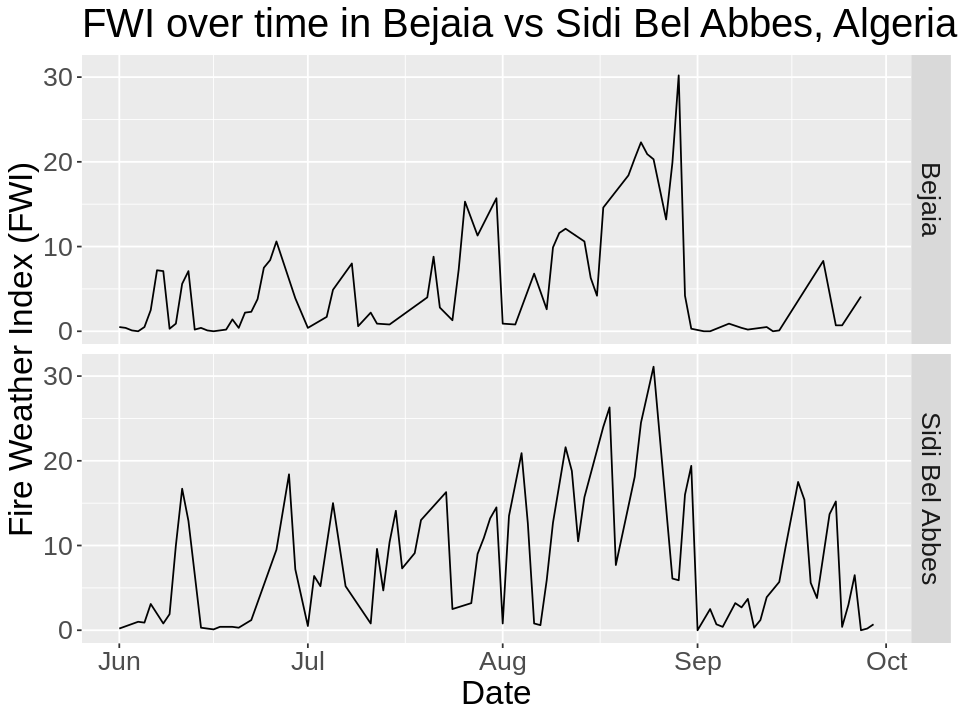

In [5]:
## Visualize how Fire Weather Index changes between Jun-Oct 2012 for both regions

options(repr.plot.width = 8, repr.plot.height = 6)
fwi_over_time <- forest_fire_train %>%
    ggplot(aes(x = date, y = FWI)) +
        geom_line() +
        facet_grid(Region ~ .) +
        labs(x = "Date", y = "Fire Weather Index (FWI)", title = "FWI over time in Bejaia vs Sidi Bel Abbes, Algeria") +
        theme(text = element_text(size = 20))

fwi_over_time

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



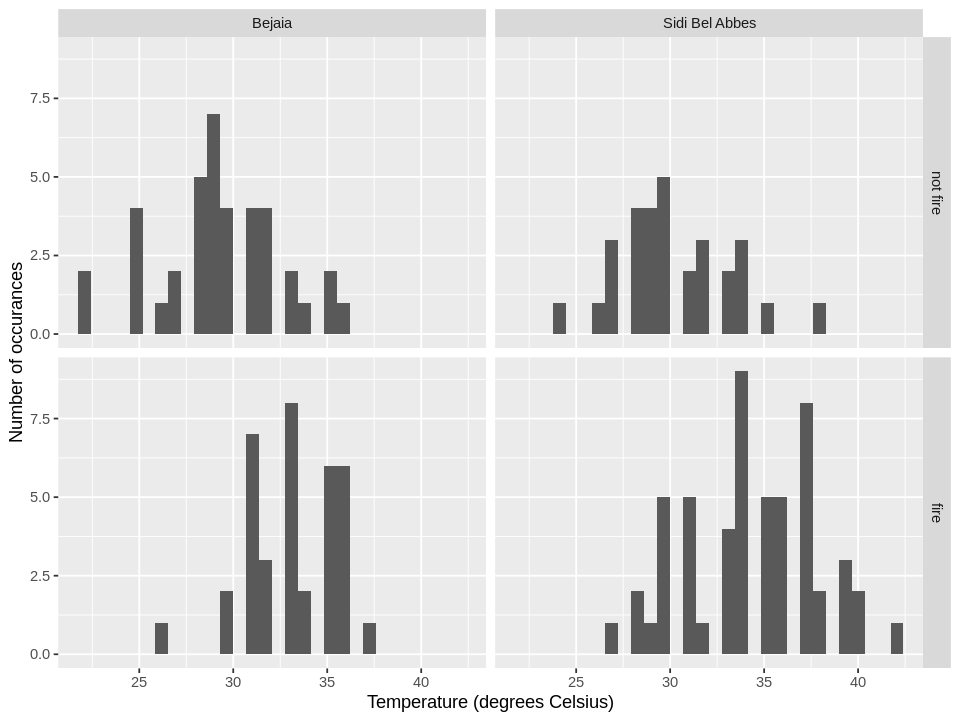

In [6]:
temp_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = Temperature)) +
    geom_histogram() +
    xlab("Temperature (degrees Celsius)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

temp_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



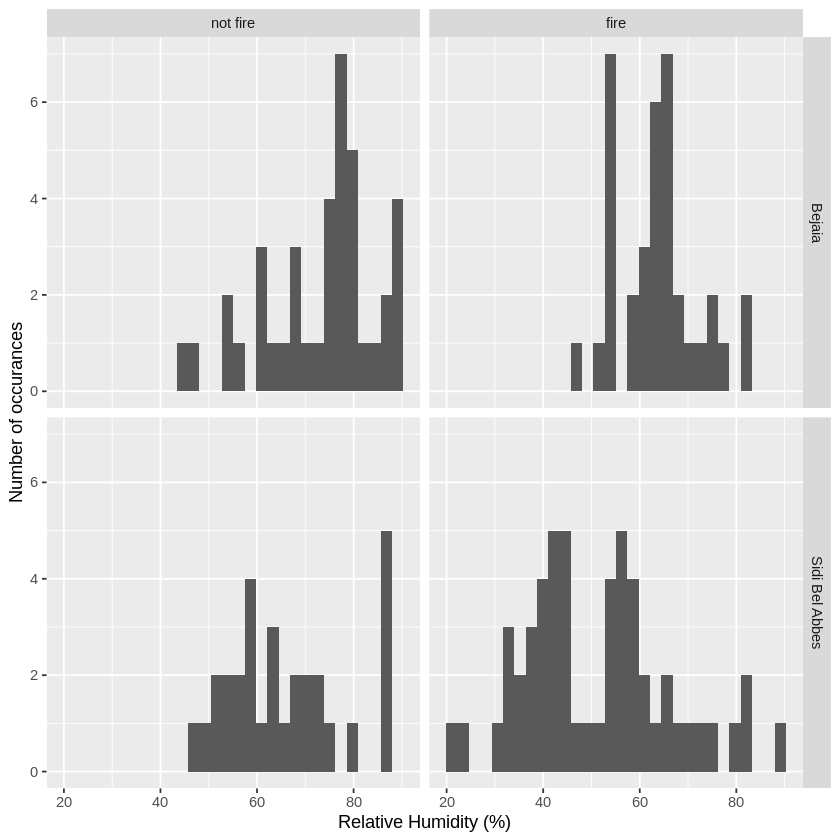

In [36]:
RH_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = RH)) +
    geom_histogram() +
    xlab("Relative Humidity (%)") +
    facet_grid(Region ~ Classes) +
    ylab("Number of occurances") 

RH_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



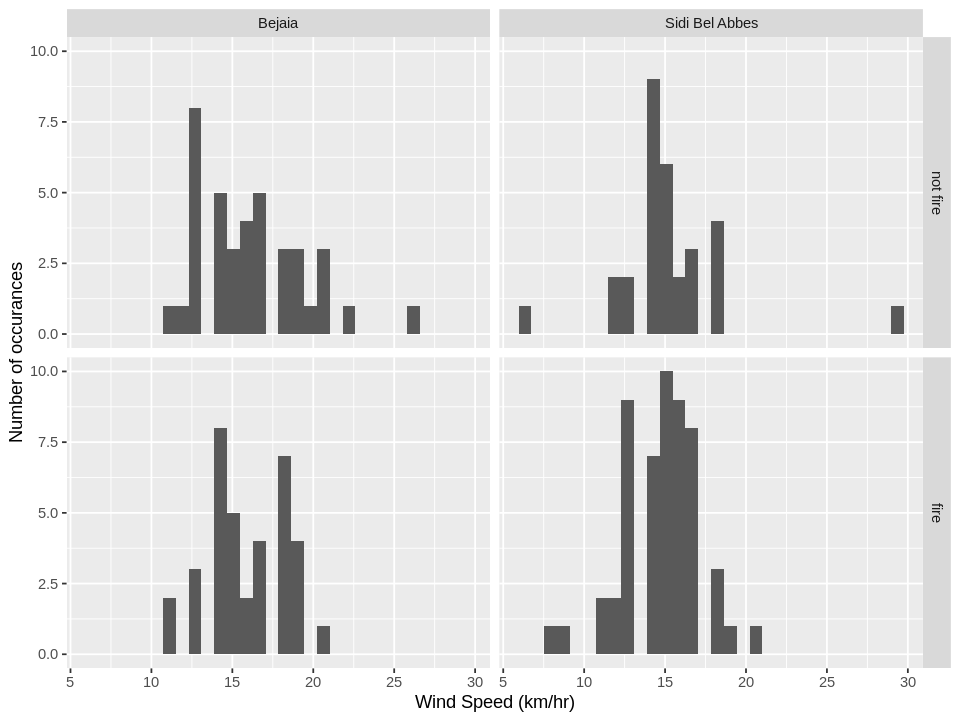

In [7]:
Ws_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = Ws)) +
    geom_histogram() +
    xlab("Wind Speed (km/hr)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

Ws_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



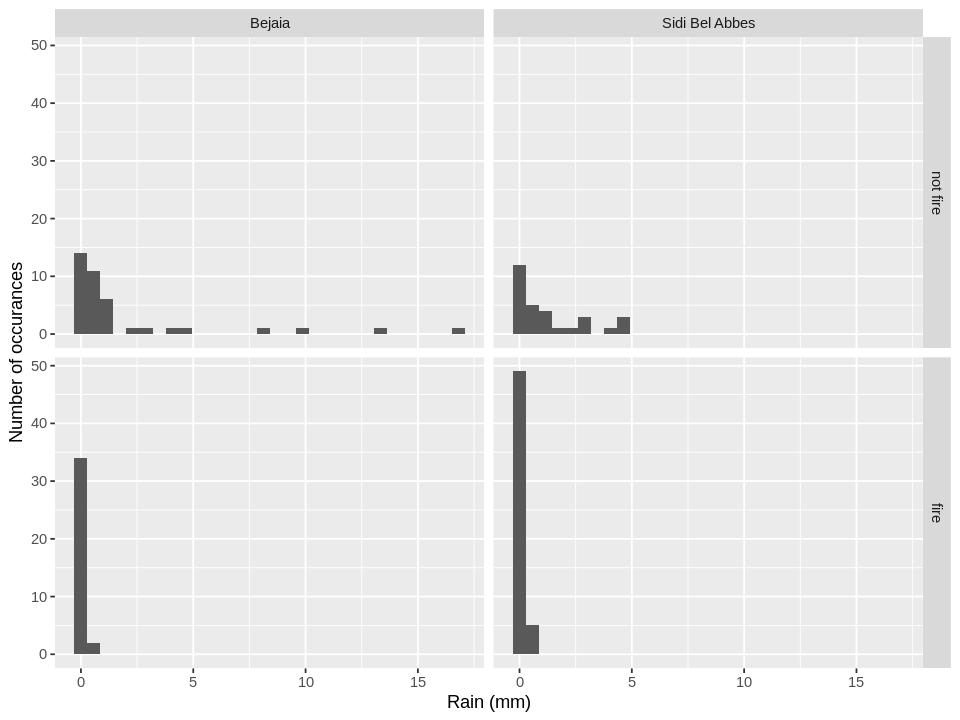

In [8]:
rain_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = Rain)) +
    geom_histogram() +
    xlab("Rain (mm)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

rain_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



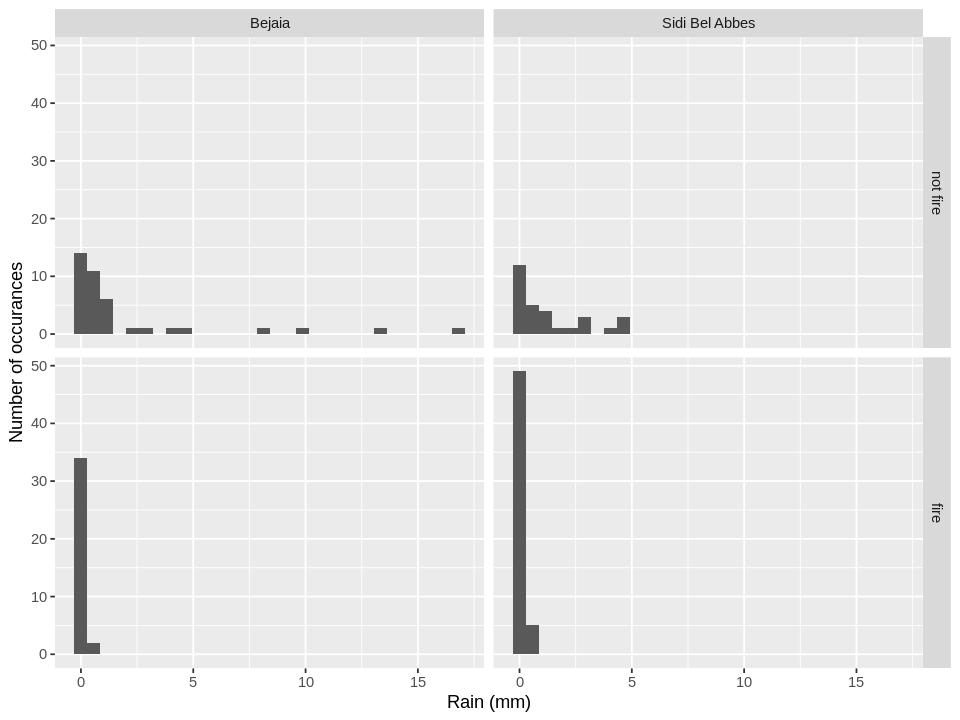

In [9]:
rain_distribution_plot_not_fire <- forest_fire_train %>%
    ggplot(aes(x = Rain)) +
    geom_histogram() +
    xlab("Rain (mm)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

rain_distribution_plot_not_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



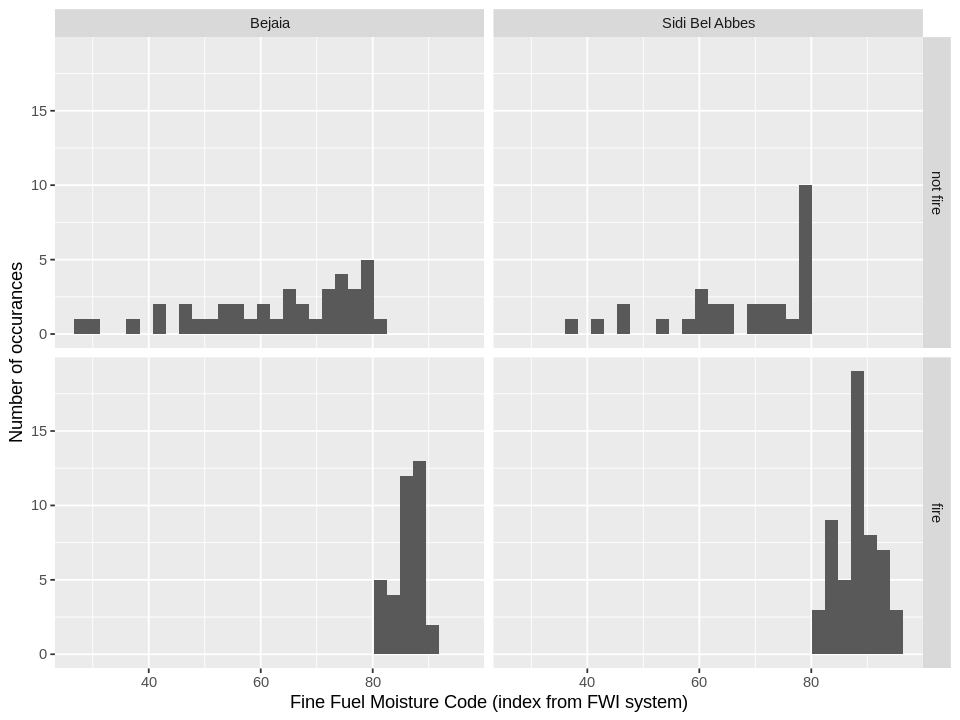

In [10]:
FFMC_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = FFMC)) +
    geom_histogram() +
    xlab("Fine Fuel Moisture Code (index from FWI system)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

FFMC_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



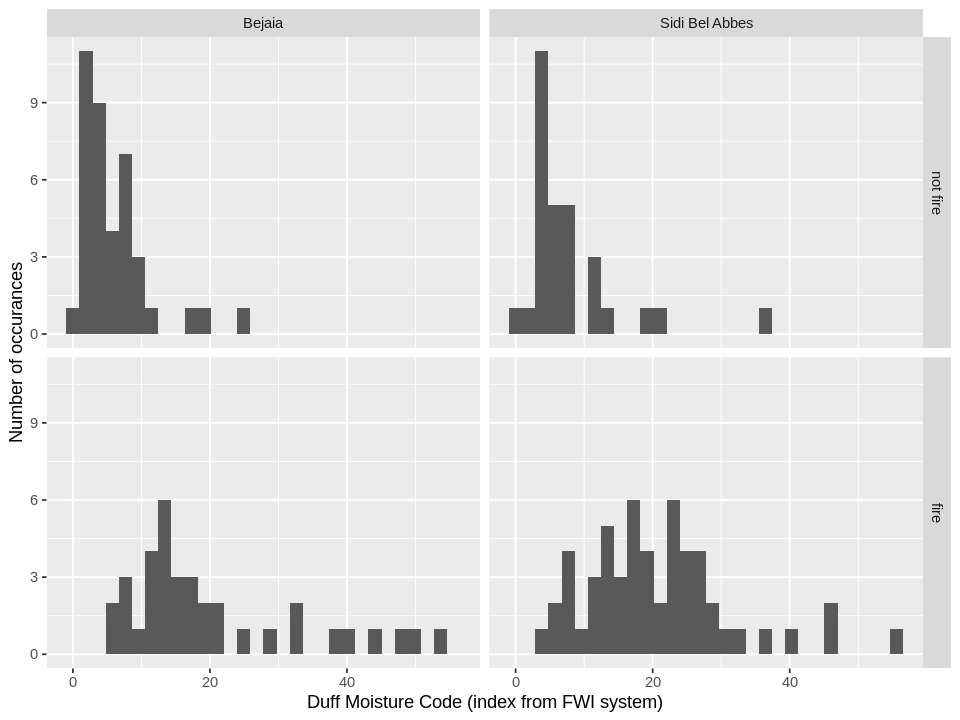

In [11]:
DMC_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = DMC)) +
    geom_histogram() +
    xlab("Duff Moisture Code (index from FWI system)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

DMC_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



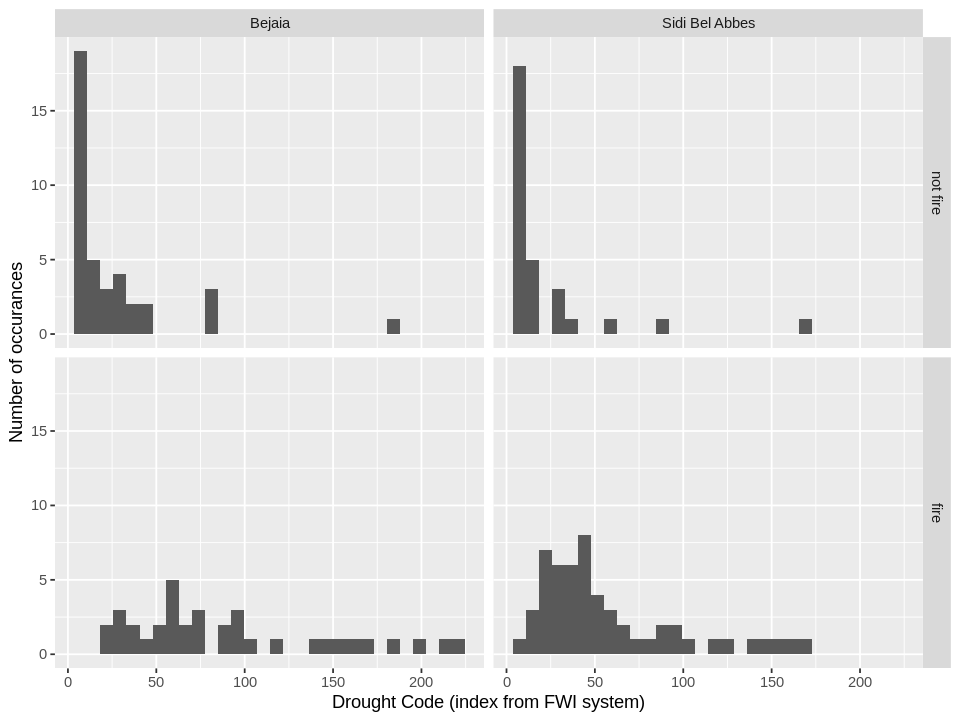

In [12]:
DC_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = DC)) +
    geom_histogram() +
    xlab("Drought Code (index from FWI system)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

DC_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



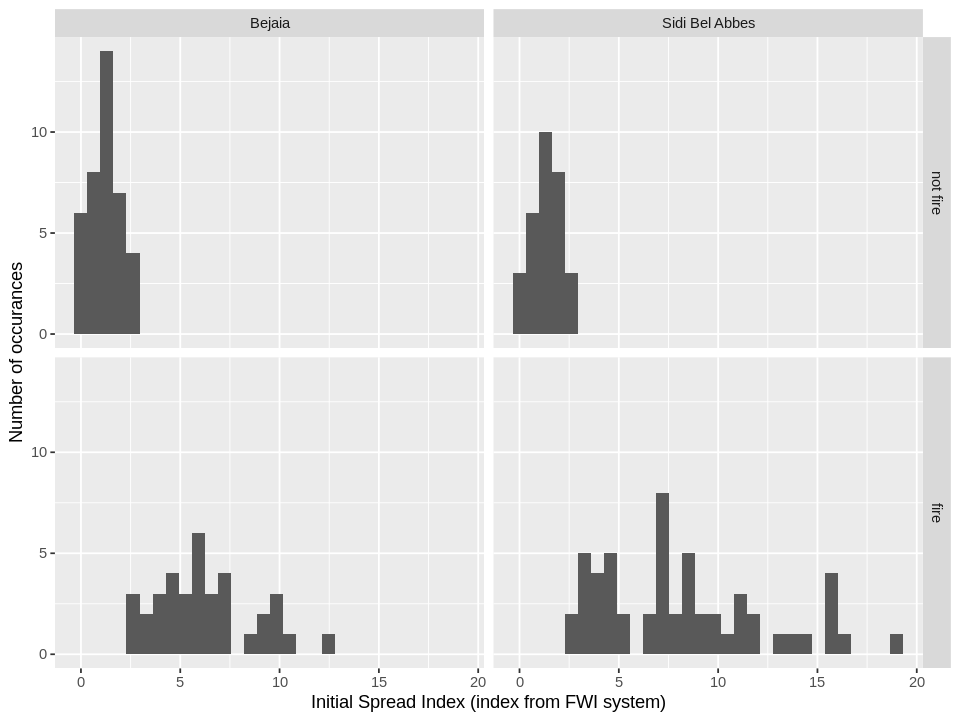

In [13]:
ISI_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = ISI)) +
    geom_histogram() +
    xlab("Initial Spread Index (index from FWI system)") +
    facet_grid(Classes ~ Region) +
    ylab("Number of occurances") 

ISI_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



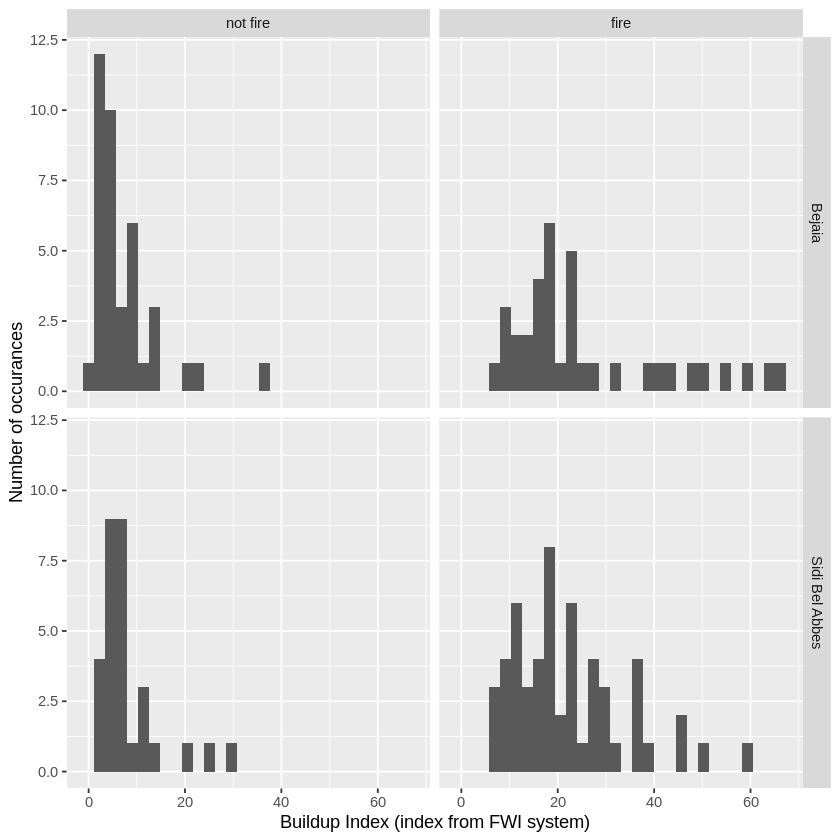

In [48]:
BUI_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = BUI)) +
    geom_histogram() +
    xlab("Buildup Index (index from FWI system)") +
    facet_grid(Region ~ Classes) +
    ylab("Number of occurances") 

BUI_distribution_plot_fire

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



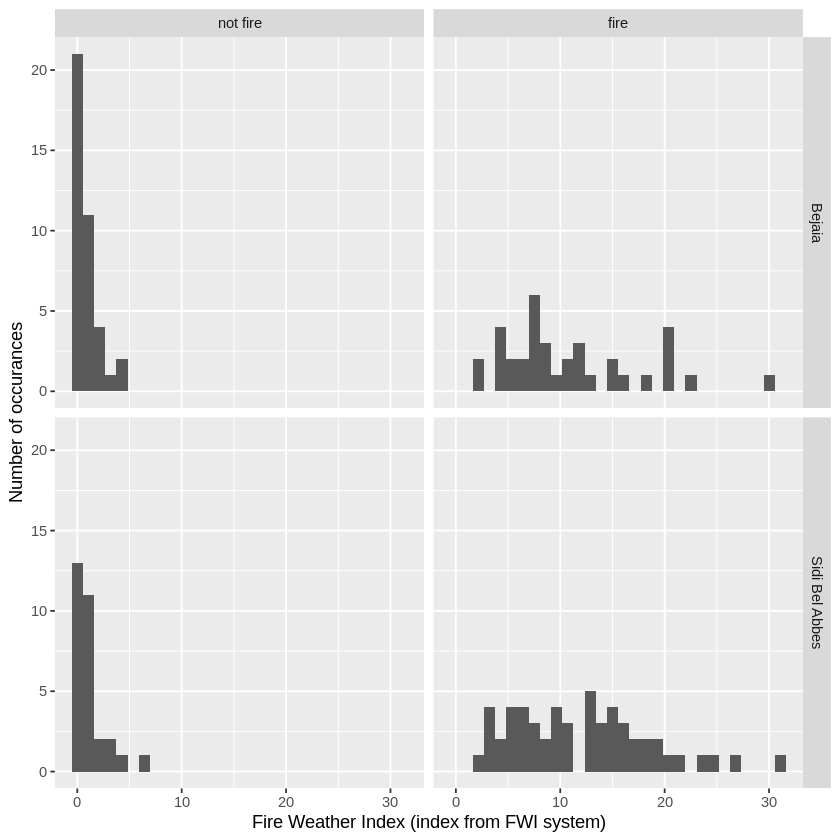

In [49]:
FWI_distribution_plot_fire <- forest_fire_train %>%
    ggplot(aes(x = FWI)) +
    geom_histogram() +
    xlab("Fire Weather Index (index from FWI system)") +
    facet_grid(Region ~ Classes) +
    ylab("Number of occurances") 

FWI_distribution_plot_fire